In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)
# from jupyterthemes import jtplot
# jtplot.style(theme='solarizedd', context='notebook', ticks=True)
# %matplotlib inline

In [140]:
df = pd.read_excel('Kr_Ariane_Final.xlsx')
df

,Horizon,Well,Sample,Depth,Layer,K air,porosity,K oil_initial,Kr water_final,RF_WF_% OIP,...,FF_10%,FF_20%,FF_30%,FF_40%,FF_50%,FF_60%,FF_70%,FF_80%,FF_90%,FF_100%
0,ARIANE,109,89,2010.0,Ba_L1b,105.0,0.324,48.000,0.193182,0.586957,...,1.278845e-07,0.000020,0.000408,0.003834,0.023559,0.107799,0.353692,0.719114,0.942906,1
1,NaN,109,98,2044.0,Ba_L4,85.0,0.380,41.000,0.779412,0.707865,...,9.875999e-03,0.069468,0.207528,0.406568,0.608998,0.769084,0.877027,0.943303,0.981320,1
2,NaN,109,125,2013.0,Ba_L2,150.0,0.429,88.000,0.434211,0.663158,...,2.874350e-05,0.001096,0.010080,0.051300,0.178257,0.429994,0.715123,0.899913,0.978645,1
3,NaN,109,127,2032.0,Ba_L3,76.0,0.366,38.000,0.710843,0.732558,...,1.626527e-02,0.111551,0.325742,0.593167,0.800710,0.917162,0.970942,0.992282,0.998977,1
4,NaN,182,16,2069.0,Ba_L4,219.0,0.411,214.000,0.654206,0.544330,...,4.055837e-01,0.789593,0.944629,0.987707,0.997741,0.999689,0.999974,0.999999,1.000000,1
5,NaN,182,10,2101.0,Ba_L4,66.0,0.343,56.000,0.910714,0.646937,...,2.344772e-01,0.637197,0.877891,0.965411,0.991488,0.998291,0.999758,0.999983,1.000000,1
6,NaN,182,15,2068.0,Ba_L4,36.0,0.418,31.500,0.761905,0.635983,...,3.109395e-01,0.717043,0.916190,0.979055,0.995553,0.999261,0.999919,0.999996,1.000000,1
7,NaN,182,28,2079.0,Ba_L4,25.0,0.362,21.200,0.655660,0.674027,...,1.806742e-01,0.558390,0.838081,0.952594,0.988215,0.997627,0.999664,0.999976,1.000000,1
8,NaN,182,30,2115.0,Ba_L4,75.0,0.230,75.000,0.320000,0.498969,...,1.673371e-01,0.311377,0.436669,0.546649,0.643963,0.730679,0.808440,0.878564,0.942124,1
9,NaN,182,34,2119.0,Ba_L4,28.0,0.258,23.000,0.826087,0.682008,...,4.628251e-01,0.825743,0.955639,0.990240,0.998210,0.999754,0.999979,0.999999,1.000000,1


In [116]:
df.describe()
#This gives us the range of the minimum and maximum value of the different parameters.

,Well,Depth,K air,porosity,K oil_initial,Kr water_final,RF_WF_% OIP,Oil_Kr_,Swi,Kr water_final.1,...,FF_10%,FF_20%,FF_30%,FF_40%,FF_50%,FF_60%,FF_70%,FF_80%,FF_90%,FF_100%
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,...,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,302.500000,2154.187500,52.659375,0.329250,30.481437,0.652238,0.603758,1.0,0.150969,0.652238,...,2.284444e-01,0.451340,0.625716,0.753840,0.845297,0.905332,0.947142,0.977400,0.993893,1.0
std,148.968063,104.796075,47.429056,0.056789,42.291105,0.430580,0.075972,0.0,0.095631,0.430580,...,2.005280e-01,0.291889,0.306367,0.271745,0.229012,0.186131,0.125534,0.055573,0.014661,0.0
min,109.000000,2010.000000,4.100000,0.220000,0.200000,0.193182,0.444194,1.0,0.030000,0.193182,...,1.278845e-07,0.000020,0.000408,0.003834,0.023559,0.107799,0.353692,0.719114,0.942124,1.0
25%,182.000000,2075.000000,19.500000,0.293750,2.331000,0.392500,0.543083,1.0,0.062000,0.392500,...,3.255111e-02,0.177245,0.365823,0.616622,0.797809,0.916664,0.960959,0.985700,0.997349,1.0
50%,266.500000,2117.350000,36.000000,0.319500,20.100000,0.613000,0.607617,1.0,0.137000,0.613000,...,1.841539e-01,0.511636,0.791370,0.884623,0.945611,0.978040,0.994326,0.999082,0.999951,1.0
75%,420.250000,2272.000000,75.000000,0.375000,41.750000,0.778186,0.662777,1.0,0.215000,0.778186,...,4.079722e-01,0.709321,0.851031,0.962777,0.991591,0.998285,0.999740,0.999977,1.000000,1.0
max,500.000000,2349.000000,219.000000,0.429000,214.000000,2.605634,0.732558,1.0,0.389000,2.605634,...,6.318627e-01,0.847246,0.968779,0.995665,0.999508,0.999961,0.999998,1.000000,1.000000,1.0


In [117]:
df.drop(df[(df['Kr water_final'] >2)].index, inplace = True)

#Remove the outlier for Kr water_final=2.06

df.loc[df['Kr water_final'] > 1.0, 'Kr water_final'] = 1.0
# replace na with an empty string
print(df.isnull().sum())

df = df.fillna("")
print(df.isnull().sum())

df.drop(['Kr water_final.1' ], axis=1, inplace=True)

df

Horizon             30
Well                 0
Sample               0
Depth                0
Layer                0
K air                0
porosity             0
K oil_initial        0
Kr water_final       0
RF_WF_% OIP          0
Oil_Kr_              0
Swi                  0
Kr water_final.1     0
Expo_Oil             0
Expo_Water           0
Sorw                 0
FF_10%               0
FF_20%               0
FF_30%               0
FF_40%               0
FF_50%               0
FF_60%               0
FF_70%               0
FF_80%               0
FF_90%               0
FF_100%              0
dtype: int64
Horizon             0
Well                0
Sample              0
Depth               0
Layer               0
K air               0
porosity            0
K oil_initial       0
Kr water_final      0
RF_WF_% OIP         0
Oil_Kr_             0
Swi                 0
Kr water_final.1    0
Expo_Oil            0
Expo_Water          0
Sorw                0
FF_10%              0
FF_20%         

,Horizon,Well,Sample,Depth,Layer,K air,porosity,K oil_initial,Kr water_final,RF_WF_% OIP,...,FF_10%,FF_20%,FF_30%,FF_40%,FF_50%,FF_60%,FF_70%,FF_80%,FF_90%,FF_100%
0,ARIANE,109,89,2010.0,Ba_L1b,105.0,0.324,48.000,0.193182,0.586957,...,1.278845e-07,0.000020,0.000408,0.003834,0.023559,0.107799,0.353692,0.719114,0.942906,1
1,,109,98,2044.0,Ba_L4,85.0,0.380,41.000,0.779412,0.707865,...,9.875999e-03,0.069468,0.207528,0.406568,0.608998,0.769084,0.877027,0.943303,0.981320,1
2,,109,125,2013.0,Ba_L2,150.0,0.429,88.000,0.434211,0.663158,...,2.874350e-05,0.001096,0.010080,0.051300,0.178257,0.429994,0.715123,0.899913,0.978645,1
3,,109,127,2032.0,Ba_L3,76.0,0.366,38.000,0.710843,0.732558,...,1.626527e-02,0.111551,0.325742,0.593167,0.800710,0.917162,0.970942,0.992282,0.998977,1
4,,182,16,2069.0,Ba_L4,219.0,0.411,214.000,0.654206,0.544330,...,4.055837e-01,0.789593,0.944629,0.987707,0.997741,0.999689,0.999974,0.999999,1.000000,1
5,,182,10,2101.0,Ba_L4,66.0,0.343,56.000,0.910714,0.646937,...,2.344772e-01,0.637197,0.877891,0.965411,0.991488,0.998291,0.999758,0.999983,1.000000,1
6,,182,15,2068.0,Ba_L4,36.0,0.418,31.500,0.761905,0.635983,...,3.109395e-01,0.717043,0.916190,0.979055,0.995553,0.999261,0.999919,0.999996,1.000000,1
7,,182,28,2079.0,Ba_L4,25.0,0.362,21.200,0.655660,0.674027,...,1.806742e-01,0.558390,0.838081,0.952594,0.988215,0.997627,0.999664,0.999976,1.000000,1
8,,182,30,2115.0,Ba_L4,75.0,0.230,75.000,0.320000,0.498969,...,1.673371e-01,0.311377,0.436669,0.546649,0.643963,0.730679,0.808440,0.878564,0.942124,1
9,,182,34,2119.0,Ba_L4,28.0,0.258,23.000,0.826087,0.682008,...,4.628251e-01,0.825743,0.955639,0.990240,0.998210,0.999754,0.999979,0.999999,1.000000,1


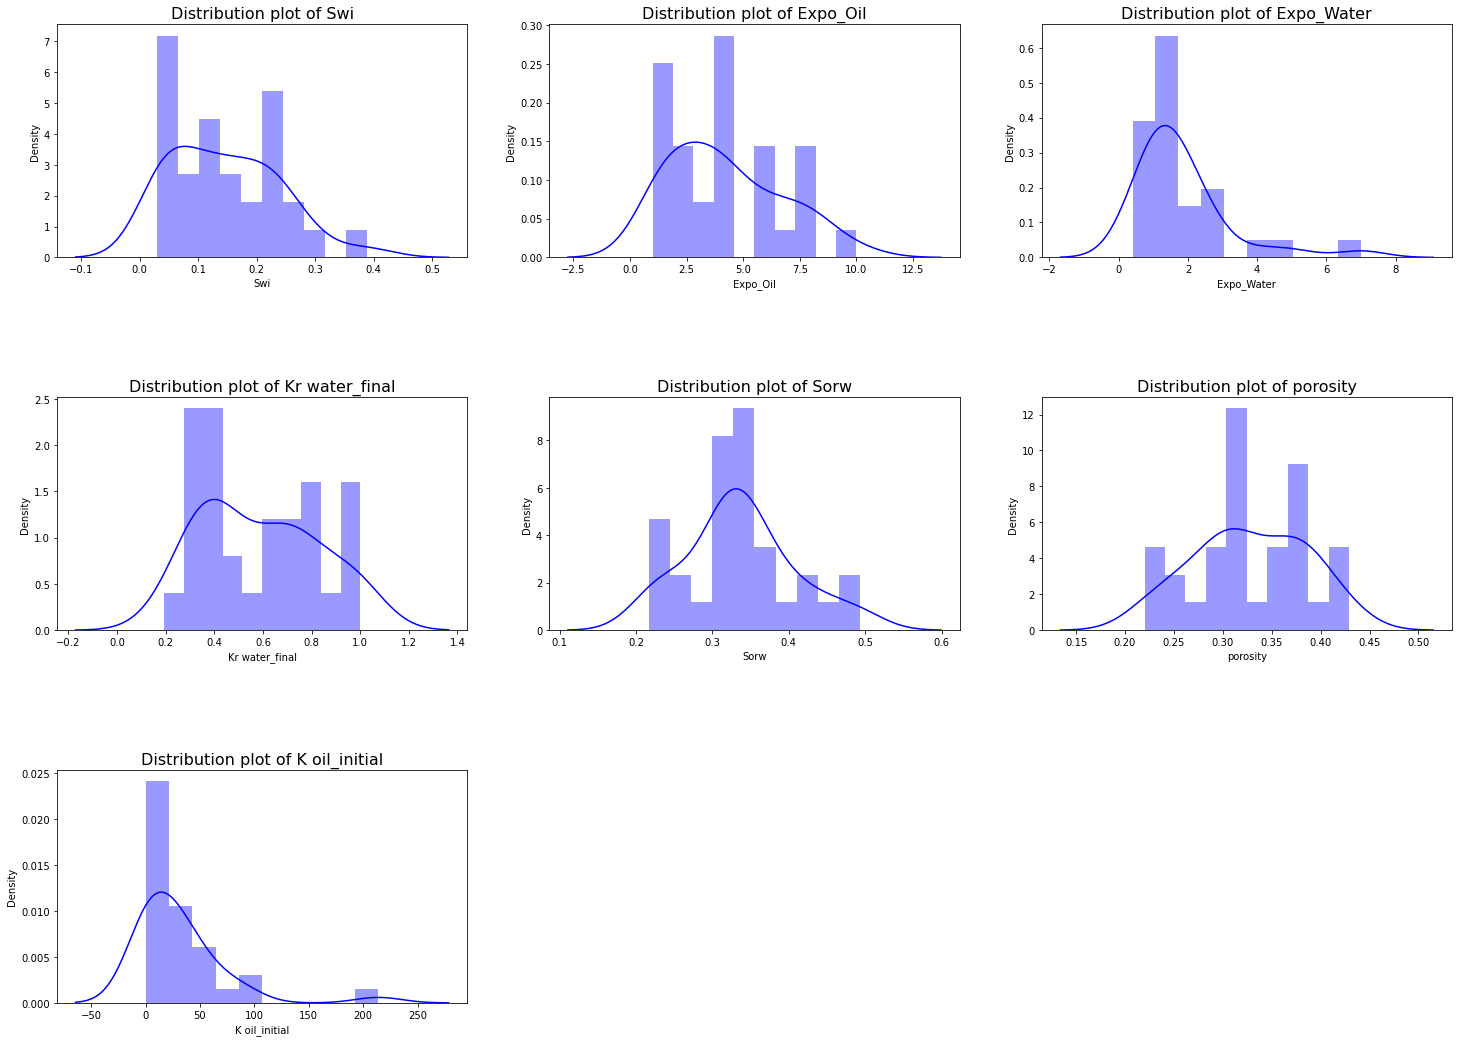

In [118]:
plt.figure(1, figsize=(25,18))
n=0
for x in ['Swi','Expo_Oil', 'Expo_Water', 'Kr water_final', 'Sorw', 'porosity', 'K oil_initial']:
  n += 1
  plt.subplot(3, 3, n) # 3 rows 3 columns
  plt.subplots_adjust(hspace=0.6, wspace= 0.2)
  sns.distplot(df[x], bins = 10, color = 'blue')
  plt.title("Distribution plot of {}".format(x), fontsize=16.0)
plt.show()

In [119]:
X_unscaled = df[df.columns[8:15]]

In [120]:
X_unscaled.drop(['RF_WF_% OIP', 'Oil_Kr_' ], axis=1, inplace=True)
print(X_unscaled.head())
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)

print(X)

   Kr water_final   Swi  Expo_Oil  Expo_Water   Sorw
0        0.193182  0.08       1.5         7.0  0.380
1        0.779412  0.11       1.2         2.7  0.260
2        0.434211  0.05       1.5         5.0  0.320
3        0.710843  0.14       2.5         2.5  0.230
4        0.654206  0.03       8.0         1.1  0.442
[[-1.66051491 -0.72324275 -1.11819961  3.81809553  0.62717657]
 [ 0.81269161 -0.39271904 -1.24141355  0.65493746 -1.10746792]
 [-0.64365493 -1.05376647 -1.11819961  2.34685922 -0.24014567]
 [ 0.52341298 -0.06219532 -0.70748648  0.50781382 -1.54112904]
 [ 0.28446768 -1.27411561  1.55143572 -0.5220516   1.52340955]
 [ 1.36663507 -1.19699341  0.73000946 -0.22780433  0.04896174]
 [ 0.73883248 -1.11987121  1.14072259 -0.37492796  0.16460471]
 [ 0.29060511 -1.06478393  0.73000946 -0.22780433 -0.38469938]
 [-1.12549012 -1.27411561 -1.32355617 -0.59561341  2.15944586]
 [ 1.00960647 -1.11987121  1.55143572 -0.5220516  -0.47143161]
 [ 0.39563372 -0.77833004  1.55143572 -0.5220516  -0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


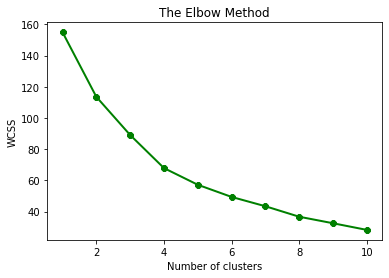

In [121]:
# within sum of squares (WSS) is the sum of the squared distances between each member of the cluster and its centroid
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, linewidth=2, color='green', marker ='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
# applying k-means of 4 to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter=300, n_init=10, random_state=0)
df_4 = df
clusters = kmeans.fit_predict(X)

df_4['label'] = clusters

print(clusters)
print(kmeans.cluster_centers_)

def average(lst):
    return sum(lst)/len(lst)

df_4.head()

[2 3 2 3 1 1 1 1 0 1 1 1 1 1 1 3 0 0 0 0 0 3 0 3 0 0 0 2 3 0 3]
[[-0.47195446  0.42657914 -0.44238983 -0.44848978  0.78618565]
 [ 0.71537974 -0.81248416  1.1817939  -0.34550324 -0.01030528]
 [-1.0152487  -0.48453118 -0.77593867  2.59206527  0.21278927]
 [ 0.15477826  0.69800922 -0.66054784  0.08746059 -1.31190816]]


,Horizon,Well,Sample,Depth,Layer,K air,porosity,K oil_initial,Kr water_final,RF_WF_% OIP,...,FF_20%,FF_30%,FF_40%,FF_50%,FF_60%,FF_70%,FF_80%,FF_90%,FF_100%,label
0,ARIANE,109,89,2010.0,Ba_L1b,105.0,0.324,48.0,0.193182,0.586957,...,0.000020,0.000408,0.003834,0.023559,0.107799,0.353692,0.719114,0.942906,1,2
1,,109,98,2044.0,Ba_L4,85.0,0.380,41.0,0.779412,0.707865,...,0.069468,0.207528,0.406568,0.608998,0.769084,0.877027,0.943303,0.981320,1,3
2,,109,125,2013.0,Ba_L2,150.0,0.429,88.0,0.434211,0.663158,...,0.001096,0.010080,0.051300,0.178257,0.429994,0.715123,0.899913,0.978645,1,2
3,,109,127,2032.0,Ba_L3,76.0,0.366,38.0,0.710843,0.732558,...,0.111551,0.325742,0.593167,0.800710,0.917162,0.970942,0.992282,0.998977,1,3
4,,182,16,2069.0,Ba_L4,219.0,0.411,214.0,0.654206,0.544330,...,0.789593,0.944629,0.987707,0.997741,0.999689,0.999974,0.999999,1.000000,1,1


# PoroPerm Curves for 4 clusters.

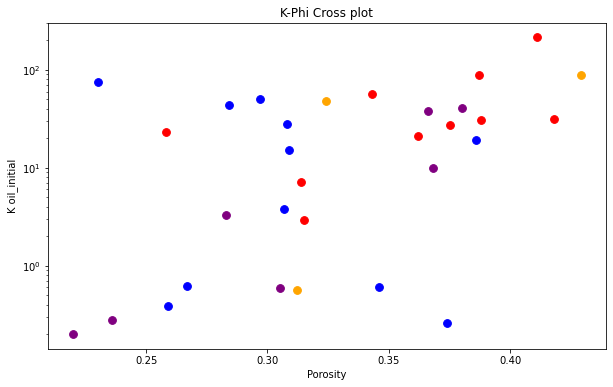

In [123]:
#K-Phi curves for the dataset

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(df_4.porosity[df_4.label == 0], df_4['K oil_initial'][df_4.label == 0], c='blue', s=60)
ax.scatter(df_4.porosity[df_4.label == 1], df_4['K oil_initial'][df_4.label == 1], c='red', s=60)
ax.scatter(df_4.porosity[df_4.label == 2], df_4['K oil_initial'][df_4.label == 2], c='orange', s=60)
ax.scatter(df_4.porosity[df_4.label == 3], df_4['K oil_initial'][df_4.label == 3], c='purple', s=60)
ax.set_yscale('log')

plt.title("K-Phi Cross plot")
plt.xlabel('Porosity')
plt.ylabel('K oil_initial')

plt.show()

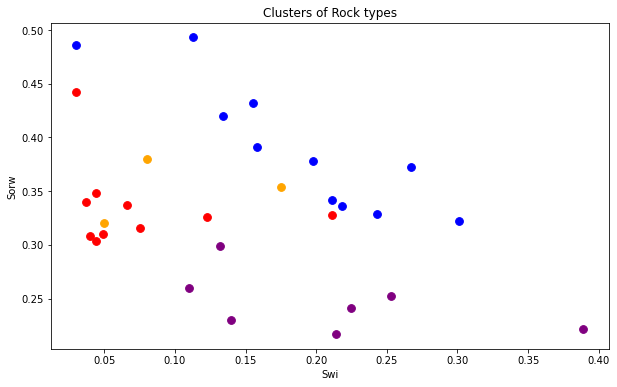

In [124]:
#Swi vs Sorw scatter plots for dataset

fig = plt.figure(figsize=(10,6))

plt.scatter(df_4.Swi[df_4.label == 0], df_4['Sorw'][df_4.label == 0], c='blue', s=60)
plt.scatter(df_4.Swi[df_4.label == 1], df_4['Sorw'][df_4.label == 1], c='red', s=60)
plt.scatter(df_4.Swi[df_4.label == 2], df_4['Sorw'][df_4.label == 2], c='orange', s=60)
plt.scatter(df_4.Swi[df_4.label == 3], df_4['Sorw'][df_4.label == 3], c='purple', s=60)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.title("Clusters of Rock types")
plt.xlabel('Swi')
plt.ylabel('Sorw')

plt.show()

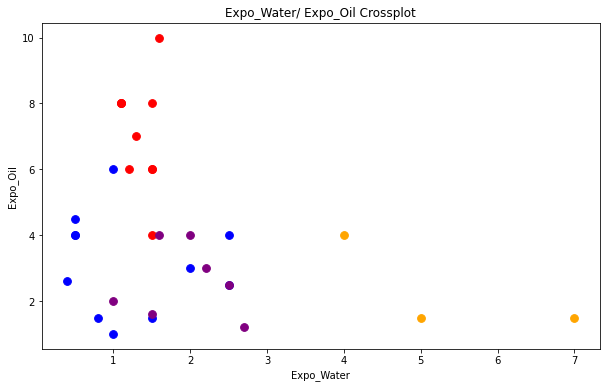

In [125]:
#Exponent curves for the dataset

fig = plt.figure(figsize=(10,6))

plt.scatter(df_4.Expo_Water[df_4.label == 0], df_4['Expo_Oil'][df_4.label == 0], c='blue', s=60)
plt.scatter(df_4.Expo_Water[df_4.label == 1], df_4['Expo_Oil'][df_4.label == 1], c='red', s=60)
plt.scatter(df_4.Expo_Water[df_4.label == 2], df_4['Expo_Oil'][df_4.label == 2], c='orange', s=60)
plt.scatter(df_4.Expo_Water[df_4.label == 3], df_4['Expo_Oil'][df_4.label == 3], c='purple', s=60)

plt.title("Expo_Water/ Expo_Oil Crossplot")
plt.xlabel('Expo_Water')
plt.ylabel('Expo_Oil')

plt.show()

In [126]:
Sw = np.linspace(0, 1, 100)
# label_color = []
color = {0: 'blue', 1: 'red', 2:'orange', 3:'purple'}
cluster = {0: [], 1: [], 2:[], 3:[]}
RF=[]

for index, row in df_4.iterrows():
  if(row.label == 0):
    cluster[0].append(row)
  elif (row.label == 1):
    cluster[1].append(row)
  elif (row.label == 2):
    cluster[2].append(row)
  elif (row.label == 3):
    cluster[3].append(row) 

def plot_graph(color, kro, krw):
  plt.plot(Sw, krw, label='krw', c=color)
  plt.plot(Sw,kro, label='Kro', c=color)
    
def kro_krw(Expo_Water, Expo_Oil, krw_end):
  krw_t = krw_end*Sw**Expo_Water
  kro_t = (1-Sw)**Expo_Oil
  return [kro_t,krw_t]



Well               408.909091
Depth             2249.790909
K air               51.063636
porosity             0.306091
K oil_initial       21.516455
Kr water_final       0.474909
RF_WF_% OIP          0.522304
Oil_Kr_              1.000000
Swi                  0.184364
Expo_Oil             3.145455
Expo_Water           1.200000
Sorw                 0.391000
FF_10%               0.291347
FF_20%               0.455945
FF_30%               0.619030
FF_40%               0.762262
FF_50%               0.863149
FF_60%               0.924077
FF_70%               0.959124
FF_80%               0.979662
FF_90%               0.992248
FF_100%              1.000000
label                0.000000
dtype: float64


Text(0, 0.5, 'Kro/Krw')

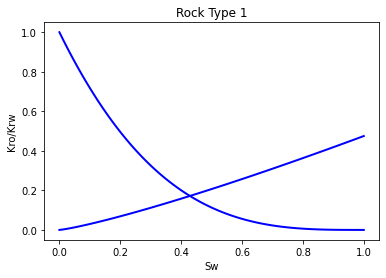

In [144]:
# For blue clusters
fig = plt.figure(figsize=(6,4))
pd_clusters = pd.DataFrame(cluster[0]).mean()
RF.append(pd_clusters['RF_WF_% OIP'])
print(pd_clusters)
for n in cluster[0]:
  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])
#   plot_graph('blue', result_arr[0], result_arr[1])

# ploting the mean
mean_arr = kro_krw(pd_clusters.Expo_Water, pd_clusters.Expo_Oil, pd_clusters['Kr water_final'])
plt.plot(Sw,mean_arr[0], label='Kro', c='blue', linewidth=2.0)
plt.plot(Sw,mean_arr[1], label='Kr1', c='blue', linewidth=2.0)

plt.title("Rock Type 1")

plt.xlabel('Sw')

plt.ylabel('Kro/Krw')

Well               182.000000
Depth             2091.800000
K air               58.340000
porosity             0.357100
K oil_initial       50.180000
Kr water_final       0.756346
RF_WF_% OIP          0.637258
Oil_Kr_              1.000000
Swi                  0.071900
Expo_Oil             7.100000
Expo_Water           1.340000
Sorw                 0.335900
FF_10%               0.298060
FF_20%               0.686983
FF_30%               0.896928
FF_40%               0.970762
FF_50%               0.992390
FF_60%               0.998218
FF_70%               0.999653
FF_80%               0.999954
FF_90%               0.999998
FF_100%              1.000000
label                1.000000
dtype: float64


Text(0, 0.5, 'Kro/Krw')

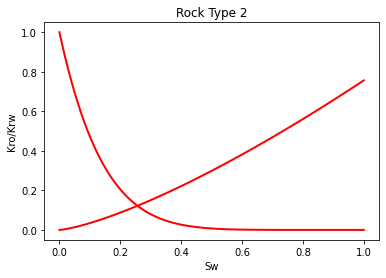

In [142]:
# For red clusters
fig = plt.figure(figsize=(6,4))
pd_clusters = pd.DataFrame(cluster[1]).mean()
RF.append(pd_clusters['RF_WF_% OIP'])
print(pd_clusters)

for n in cluster[1]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

#   plot_graph('red', result_arr[0], result_arr[1])
# ploting the mean
mean_arr = kro_krw(pd_clusters.Expo_Water, pd_clusters.Expo_Oil, pd_clusters['Kr water_final'])
plt.plot(Sw,mean_arr[0], label='Kro', c='red', linewidth=2.0)
plt.plot(Sw,mean_arr[1], label='Kr1', c='red', linewidth=2.0)

plt.title("Rock Type 2")

plt.xlabel('Sw')

plt.ylabel('Kro/Krw')


Well               239.333333
Depth             2046.900000
K air               95.066667
porosity             0.355000
K oil_initial       45.520000
Kr water_final       0.346131
RF_WF_% OIP          0.607008
Oil_Kr_              1.000000
Swi                  0.101667
Expo_Oil             2.333333
Expo_Water           5.333333
Sorw                 0.351333
FF_10%               0.000128
FF_20%               0.003370
FF_30%               0.027721
FF_40%               0.123225
FF_50%               0.300296
FF_60%               0.486475
FF_70%               0.684834
FF_80%               0.872449
FF_90%               0.973829
FF_100%              1.000000
label                2.000000
dtype: float64


Text(0, 0.5, 'Kro/Krw')

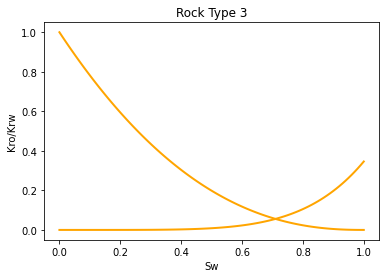

In [146]:
# For orange clusters
fig = plt.figure(figsize=(6,4))
pd_clusters = pd.DataFrame(cluster[2]).mean()
RF.append(pd_clusters['RF_WF_% OIP'])
print(pd_clusters)

for n in cluster[2]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

#   plot_graph('orange', result_arr[0], result_arr[1])

# ploting the mean
mean_arr = kro_krw(pd_clusters.Expo_Water, pd_clusters.Expo_Oil, pd_clusters['Kr water_final'])
plt.plot(Sw,mean_arr[0], label='Kro', c='orange', linewidth=2.0)
plt.plot(Sw,mean_arr[1], label='Kr1', c='orange', linewidth=2.0)

plt.title("Rock Type 3")

plt.xlabel('Sw')

plt.ylabel('Kro/Krw')

Well               351.714286
Depth             2151.514286
K air               32.400000
porosity             0.308286
K oil_initial       13.323571
Kr water_final       0.623465
RF_WF_% OIP          0.686888
Oil_Kr_              1.000000
Swi                  0.209000
Expo_Oil             2.614286
Expo_Water           1.928571
Sorw                 0.245857
FF_10%               0.081265
FF_20%               0.242902
FF_30%               0.458985
FF_40%               0.668255
FF_50%               0.819328
FF_60%               0.909361
FF_70%               0.958201
FF_80%               0.983378
FF_90%               0.995483
FF_100%              1.000000
label                3.000000
dtype: float64


Text(0, 0.5, 'Kro/Krw')

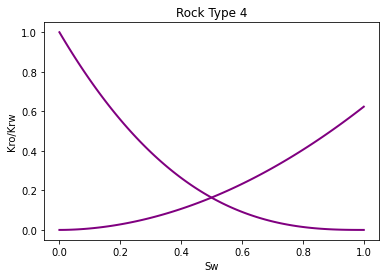

In [149]:
# For purple clusters
fig = plt.figure(figsize=(6,4))
pd_clusters = pd.DataFrame(cluster[3]).mean()
RF.append(pd_clusters['RF_WF_% OIP'])
print(pd_clusters)

for n in cluster[3]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

#   plot_graph('purple', result_arr[0], result_arr[1])

# ploting the mean
mean_arr = kro_krw(pd_clusters.Expo_Water, pd_clusters.Expo_Oil, pd_clusters['Kr water_final'])
plt.plot(Sw,mean_arr[0], label='Kro', c='purple', linewidth=2.0)
plt.plot(Sw,mean_arr[1], label='Kr1', c='purple', linewidth=2.0)

plt.title("Rock Type 4")

plt.xlabel('Sw')

plt.ylabel('Kro/Krw')


Text(0, 0.5, 'ff')

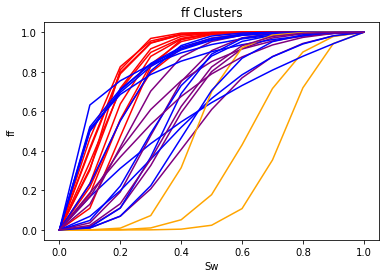

In [111]:
Sw =  np.arange(0, 1.1, .1)

label_color = []
color = {0: 'blue', 1: 'red', 2:'orange', 3:'purple'}

def plot_graph(color, ff):
  plt.plot(Sw, ff, label='ff', c=color)

# Calculating Krw/Kro using Swi, Exp_Water and Exp_Oil
for index, row in df_4.iterrows():
  ff1 = row[-11:-1]
  ff2 = pd.Series([0], index=['FF_0%'])
  ff = ff2.append(ff1)
  label_color.append(color[row.label])
  plot_graph(color[row.label], ff)

# print(label_color)
plt.title("ff Clusters")
plt.xlabel('Sw')
plt.ylabel('ff')

(-0.3, 0.4)

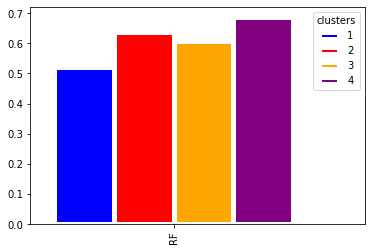

In [112]:
RF_plot_data = pd.DataFrame({'clusters': [1, 2,3,4], 'RF': RF })
RF_plot_data.set_index('clusters', inplace=True)
# print(RF_plot_data)
ax = RF_plot_data.T.plot(kind='bar', label='index', color=['blue', 'red', 'orange', 'purple'], edgecolor='white', linewidth=5)
ax.axes.set_xlim(-0.3,0.4)


# Applying a K Means of Three (3)


In [50]:
#applying k-means of 3 to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(X)
df_3 = df
df_3['label'] = y_kmeans

print(y_kmeans)
print(kmeans.cluster_centers_)

[0 1 0 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1]
[[-1.15208492 -0.88850461 -1.11819961  3.08247737  0.19351545]
 [-0.21161903  0.77072444 -0.53224888  0.0124976  -0.48588698]
 [ 0.39131824 -0.69884696  0.73000946 -0.45374419  0.49294813]]


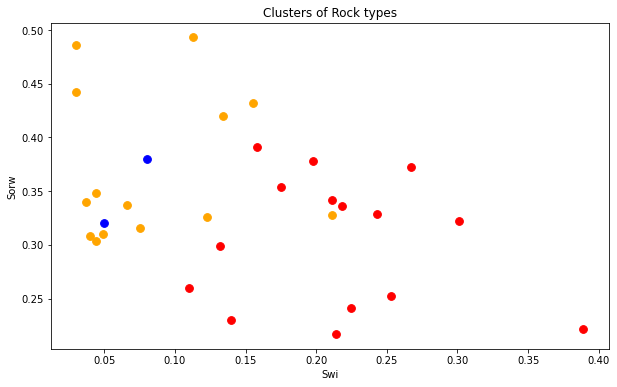

In [51]:
#Swi vs Sorw scatter plots for dataset

fig = plt.figure(figsize=(10,6))

plt.scatter(df_3.Swi[df_4.label == 0], df_3['Sorw'][df_4.label == 0], c='blue', s=60)
plt.scatter(df_3.Swi[df_4.label == 1], df_3['Sorw'][df_4.label == 1], c='red', s=60)
plt.scatter(df_3.Swi[df_4.label == 2], df_3['Sorw'][df_4.label == 2], c='orange', s=60)

plt.title("Clusters of Rock types")
plt.xlabel('Swi')
plt.ylabel('Sorw')

plt.show()

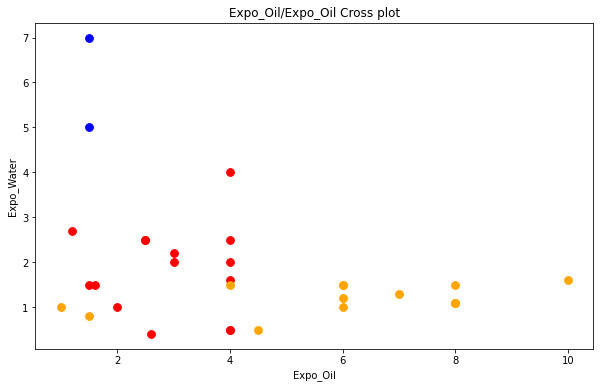

In [52]:
fig = plt.figure(figsize=(10,6))

plt.scatter(df_3.Expo_Oil[df_3.label == 0], df_3['Expo_Water'][df_3.label == 0], c='blue', s=60)
plt.scatter(df_3.Expo_Oil[df_3.label == 1], df_3['Expo_Water'][df_3.label == 1], c='red', s=60)
plt.scatter(df_3.Expo_Oil[df_3.label == 2], df_3['Expo_Water'][df_3.label == 2], c='orange', s=60)

plt.title("Expo_Oil/Expo_Oil Cross plot")
plt.xlabel('Expo_Oil')
plt.ylabel('Expo_Water')

plt.show()

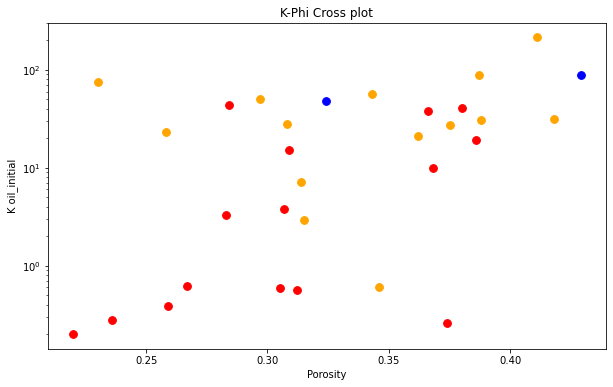

In [53]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(df_3.porosity[df_3.label == 0], df_3['K oil_initial'][df_3.label == 0], c='blue', s=60)
ax.scatter(df_3.porosity[df_3.label == 1], df_3['K oil_initial'][df_3.label == 1], c='red', s=60)
ax.scatter(df_3.porosity[df_3.label == 2], df_3['K oil_initial'][df_3.label == 2], c='orange', s=60)

ax.set_yscale('log')
plt.title("K-Phi Cross plot")
plt.xlabel('Porosity')
plt.ylabel('K oil_initial')

plt.show()

In [54]:
#Kr plots for n = 3 clusters

Sw = np.linspace(0, 1, 100)
# label_color = []
color = {0: 'blue', 1: 'red', 2:'orange'}
cluster = {0: [], 1: [], 2:[]}

for index, row in df_3.iterrows():
  if(row.label == 0):
    cluster[0].append(row)
  elif (row.label == 1):
    cluster[1].append(row)
  elif (row.label == 2):
    cluster[2].append(row)
    

def plot_graph(color, kro, krw):
  plt.plot(Sw, krw, label='krw', c=color)
  plt.plot(Sw,kro, label='Kro', c=color)
    
def kro_krw(Expo_Water, Expo_Oil, krw_end):
  krw_t = krw_end*Sw**Expo_Water
  kro_t = (1-Sw)**Expo_Oil
  return [kro_t,krw_t]


Text(0, 0.5, 'Kro/Krw')

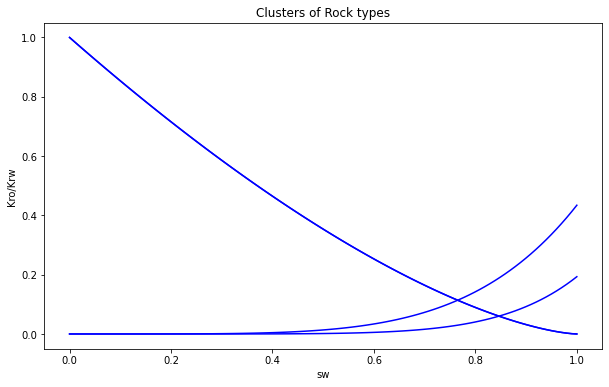

In [55]:
# For blue clusters
fig = plt.figure(figsize=(10,6))

for n in cluster[0]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

  plot_graph('blue', result_arr[0], result_arr[1])

plt.title("Clusters of Rock types")

plt.xlabel('sw')

plt.ylabel('Kro/Krw')

Text(0, 0.5, 'Kro/Krw')

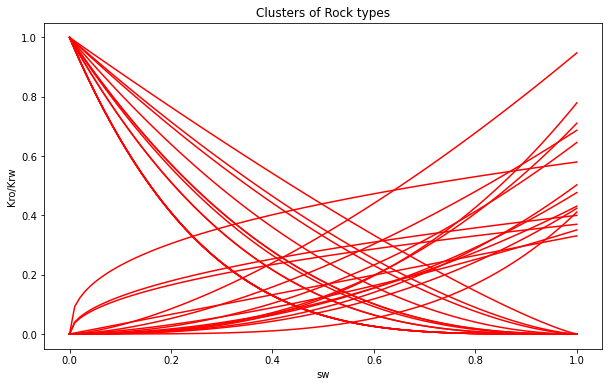

In [56]:
# For red clusters
fig = plt.figure(figsize=(10,6))

for n in cluster[1]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

  plot_graph('red', result_arr[0], result_arr[1])

plt.title("Clusters of Rock types")

plt.xlabel('sw')

plt.ylabel('Kro/Krw')

Text(0, 0.5, 'Kro/Krw')

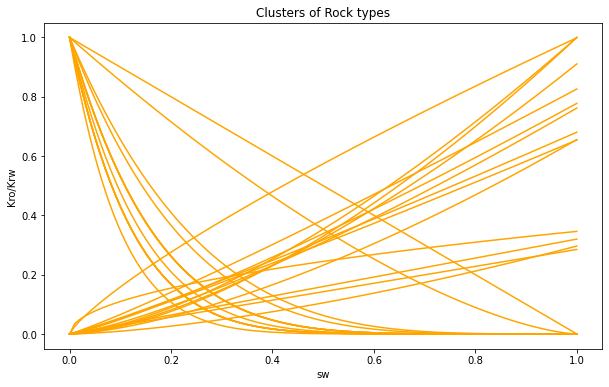

In [57]:
# For orange clusters
fig = plt.figure(figsize=(10,6))

for n in cluster[2]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

  plot_graph('orange', result_arr[0], result_arr[1])

plt.title("Clusters of Rock types")

plt.xlabel('sw')

plt.ylabel('Kro/Krw')

## Applying a Kmeans of 2

In [58]:
#applying k-means of 2 to the dataset
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(X)
df_2= df
df_2['label'] = y_kmeans

print(y_kmeans)
print(kmeans.cluster_centers_)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
[[ 0.39131824 -0.69884696  0.73000946 -0.45374419  0.49294813]
 [-0.32226208  0.57552102 -0.60118426  0.37367169 -0.40595728]]


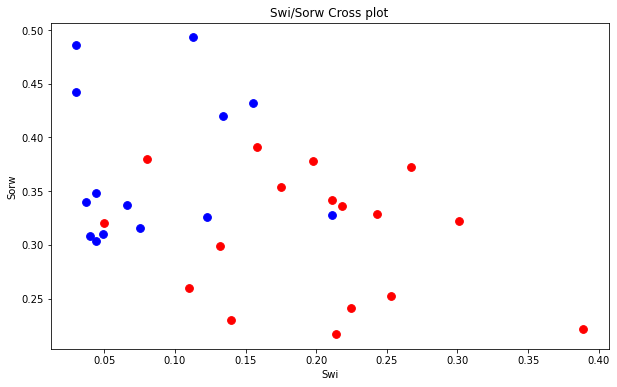

In [59]:
#Swi/Sorw curves for the dataset
fig = plt.figure(figsize=(10,6))

plt.scatter(df_2.Swi[df_2.label == 0], df_2['Sorw'][df_2.label == 0], c='blue', s=60)
plt.scatter(df_2.Swi[df_2.label == 1], df_2['Sorw'][df_2.label == 1], c='red', s=60)

plt.title("Swi/Sorw Cross plot")
plt.xlabel('Swi')
plt.ylabel('Sorw')

plt.show()

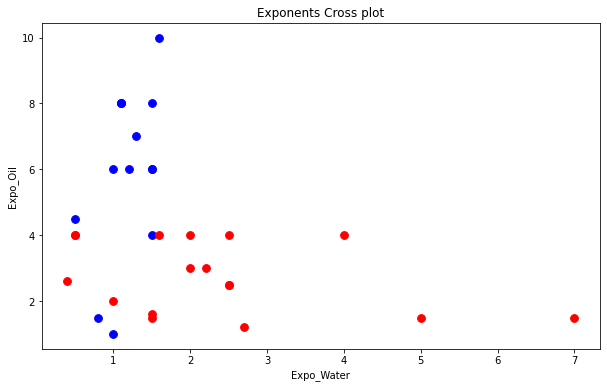

In [60]:
#Exponwnt curves for the dataset

fig = plt.figure(figsize=(10,6))

plt.scatter(df_2.Expo_Water[df_2.label == 0], df_2['Expo_Oil'][df_2.label == 0], c='blue', s=60)
plt.scatter(df_2.Expo_Water[df_2.label == 1], df_2['Expo_Oil'][df_2.label == 1], c='red', s=60)

plt.title("Exponents Cross plot")
plt.xlabel('Expo_Water')
plt.ylabel('Expo_Oil')

plt.show()

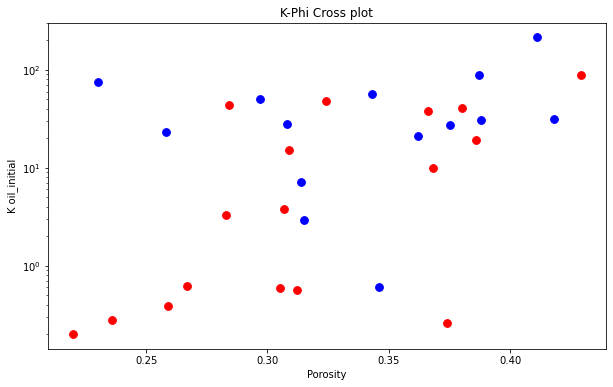

In [61]:
#PoroPerm curves for the dataset

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(df_2.porosity[df_4.label == 0], df_2['K oil_initial'][df_2.label == 0], c='blue', s=60)
ax.scatter(df_2.porosity[df_4.label == 1], df_2['K oil_initial'][df_2.label == 1], c='red', s=60)

ax.set_yscale('log')
plt.title("K-Phi Cross plot")
plt.xlabel('Porosity')
plt.ylabel('K oil_initial')

plt.show()

In [62]:
#Kr plots for n = 2 clusters

Sw = np.linspace(0, 1, 100)
# label_color = []
color = {0: 'blue', 1: 'red'}
cluster = {0: [], 1: [], 2:[]}

for index, row in df_2.iterrows():
  if(row.label == 0):
    cluster[0].append(row)
  elif (row.label == 1):
    cluster[1].append(row)

def plot_graph(color, kro, krw):
  plt.plot(Sw, krw, label='krw', c=color)
  plt.plot(Sw,kro, label='Kro', c=color)
    
def kro_krw(Expo_Water, Expo_Oil, krw_end):
  krw_t = krw_end*Sw**Expo_Water
  kro_t = (1-Sw)**Expo_Oil
  return [kro_t,krw_t]


Text(0, 0.5, 'Kro/Krw')

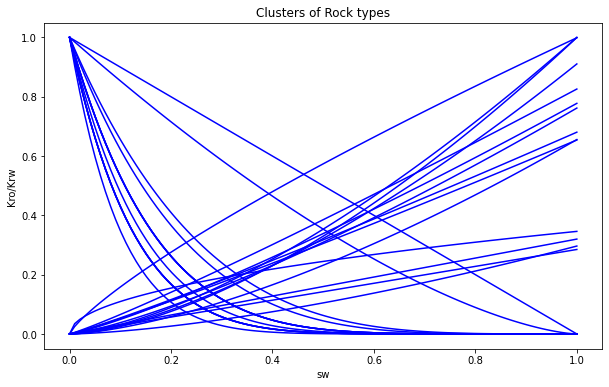

In [63]:
# For blue clusters
fig = plt.figure(figsize=(10,6))

for n in cluster[0]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

  plot_graph('blue', result_arr[0], result_arr[1])

plt.title("Clusters of Rock types")

plt.xlabel('sw')

plt.ylabel('Kro/Krw')

Text(0, 0.5, 'Kro/Krw')

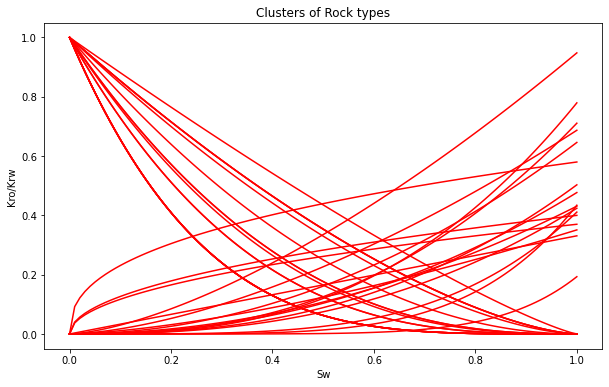

In [64]:
# Forred clusters
fig = plt.figure(figsize=(10,6))

for n in cluster[1]:

  result_arr = kro_krw(n.Expo_Water, n.Expo_Oil, n['Kr water_final'])

  plot_graph('red', result_arr[0], result_arr[1])

plt.title("Clusters of Rock types")

plt.xlabel('Sw')

plt.ylabel('Kro/Krw')

# Silhouette Validation for K Means

For n_clusters = 2 The average silhouette_score is : 0.24539885776587833
For n_clusters = 3 The average silhouette_score is : 0.26890409771713014
For n_clusters = 4 The average silhouette_score is : 0.30351676534004296
For n_clusters = 5 The average silhouette_score is : 0.29431434334224543
For n_clusters = 6 The average silhouette_score is : 0.2749886982375421


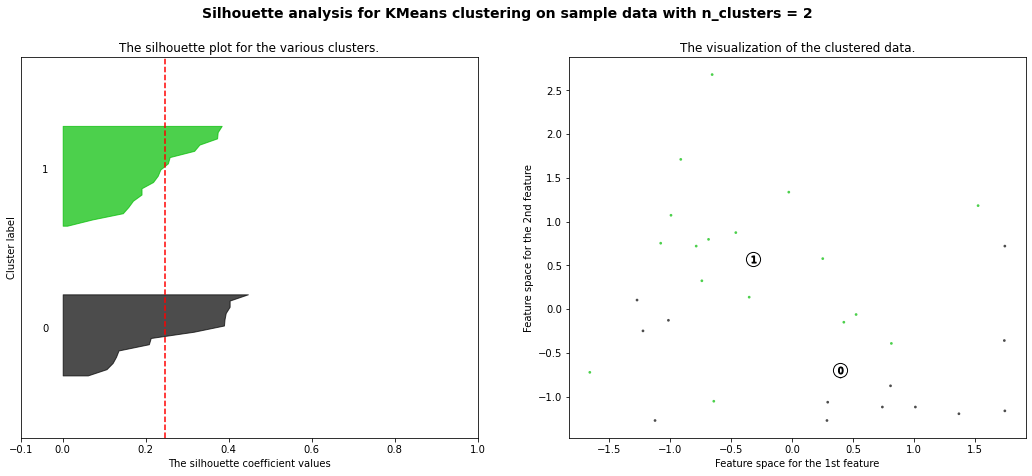

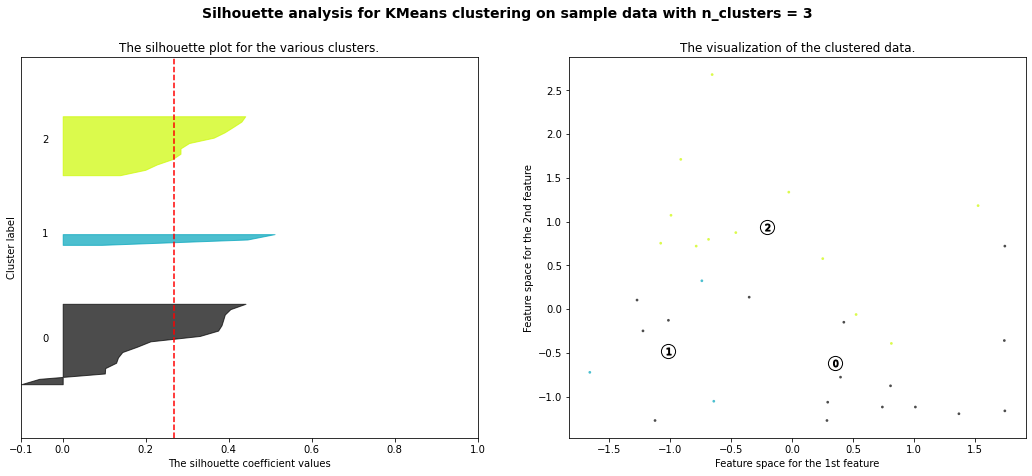

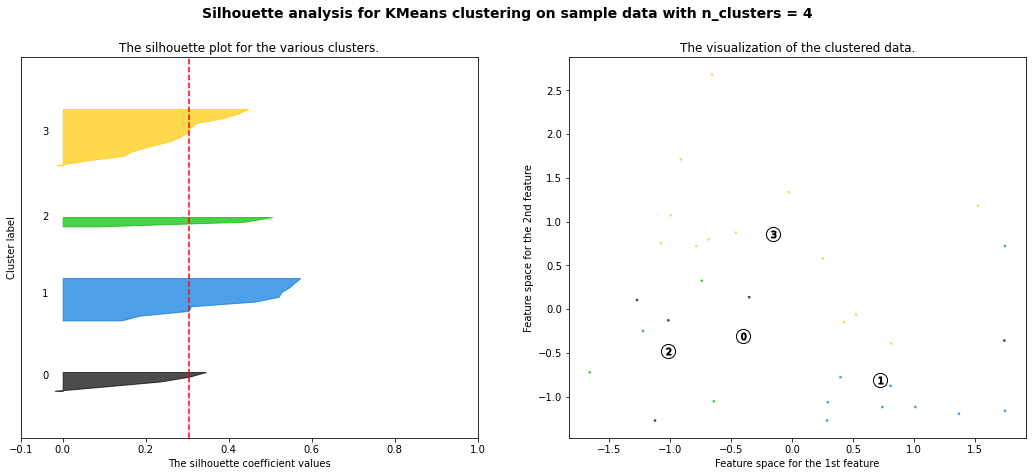

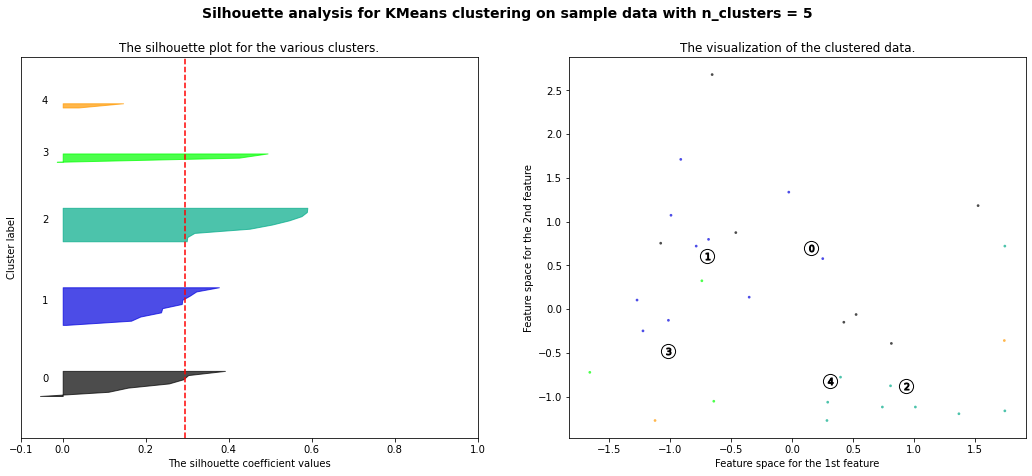

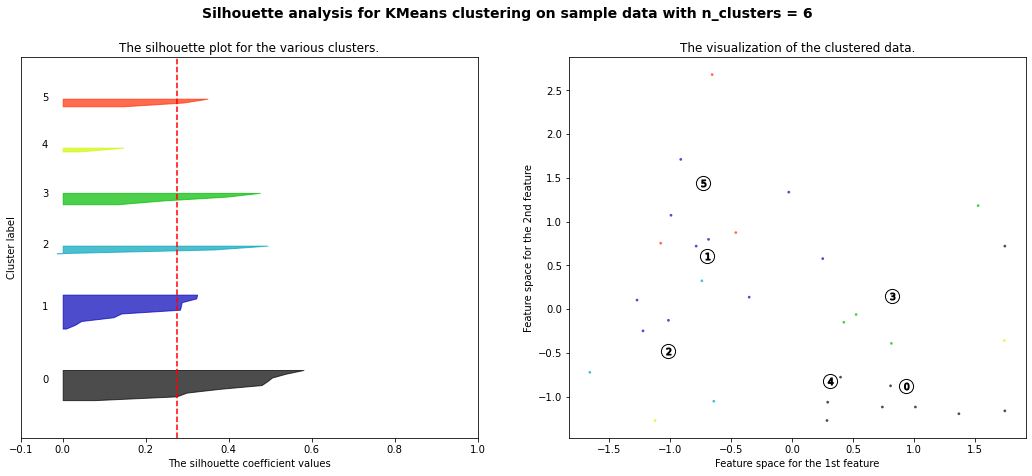

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
                           # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
